In [1]:
# Normalize image

> Normalize image based on stats

In [2]:
#| default_exp preprocessing.normalize

In [3]:
#| export
import numpy as np
import pandas as pd
from pathlib import Path	
from fastcore.all import *
from tqdm.auto import tqdm
import os

In [4]:
#| export
from cv_tools.core import *

# First create symlink of only 5000 images

In [18]:
root_path = Path(os.getenv('DATA_PATH'), 'crack_detect_usm')
good_path = Path(root_path, 'good')
tst_im_path =Path(root_path, 'test_data_sig1')
good_images = good_path.ls()
sel_images = np.random.choice(good_images, 5000, replace=False)

In [6]:
symlink_path = Path(root_path, 'good_sym')
symlink_path.mkdir(exist_ok=True, parents=True)

In [14]:
#for i in tqdm(sel_images,total=len(sel_images)):
	#name_ = Path(i).name
	#tr_path = Path(symlink_path, name_)
	#tr_path.symlink_to(i)


  0%|          | 0/5000 [00:00<?, ?it/s]

# Getting stats from the training images

In [27]:

cnt = 0
total=0
ttl_sq=0
t_p=0
for i in tqdm(Path(symlink_path).ls(), total=len(sel_images)):
	img = read_img(i)
	total +=np.sum(img)
	ttl_sq += np.sum(np.square(img))
	t_p += np.sum(np.square(img.shape))
	cnt +=1


  0%|          | 0/5000 [00:00<?, ?it/s]

In [29]:
# Calculate average and standard deviation
# Calculate average and standard deviation
# Calculate average and standard deviation
avg = total / t_p
std_dev = np.sqrt((ttl_sq / t_p) - np.square(avg))

print(f'Average: {avg}')
print(f'Standard Deviation: {std_dev}')

Average: 49.23998160606712
Standard Deviation: nan


/tmp/ipykernel_430683/1896120113.py:5: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt((ttl_sq / t_p) - np.square(avg))


In [33]:
ttl_sq/t_p - np.square(avg)

-2389.838875907802

In [31]:
t_p

8757974765

In [25]:
cnt

5000

In [26]:
img.shape

(1075, 776)

In [10]:
im_path =Path(root_path, 'labeling_test/image')
msk_path =Path(root_path, 'labeling_test/masks')

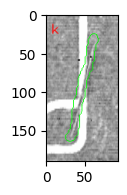

In [38]:
img = read_img(im_path.ls()[0])
msk = read_img(msk_path.ls()[0])	
show_poster_from_path(
    mask_path=msk_path.ls()[0],
	im_path = im_path,
	show_='poster', 
	text='k'
)

In [7]:
from transformers import SegGptImageProcessor, SegGptForImageSegmentation

checkpoint = "BAAI/seggpt-vit-large"
image_processor = SegGptImageProcessor.from_pretrained(checkpoint)
model = SegGptForImageSegmentation.from_pretrained(
    checkpoint)

In [8]:
from labeling_test.seg_gpt import *

In [9]:
from PIL import Image
import requests
import torch
import numpy as np
import cv2

In [33]:
tst_imgs = tst_im_path.ls()
sn_tst_img = tst_imgs[2]
image_input = read_img(sn_tst_img, cv=False, gray=False)

In [34]:
image_prompt = read_img(im_path.ls()[0], cv=False, gray=False)
mask_prompt = read_img(msk_path.ls()[0], cv=False)


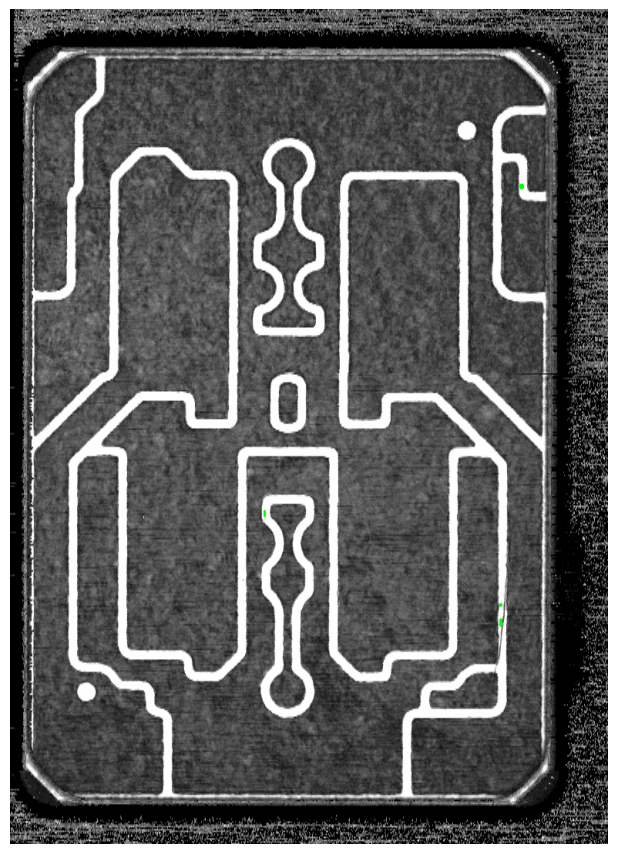

In [35]:
f_msk = get_mask(
    image_prompt=image_prompt, 
    mask_prompt=mask_prompt, 
    test_img=image_input,
    model=model,
    show=True,
    save_msk_path=None,
    )